 # Problem Statement:1
## Clustering:
Digital Ads Data:
The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.
The following three features are commonly used in digital marketing:
CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 
CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 
CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


# Q.1) Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [133]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [134]:
#Read the data
df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

In [135]:
#Check the first few observations
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [136]:
#Check the last few observations
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


# Summarizing the dataset

In [137]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [138]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

# Thus no duplicate record present in the dataset

In [139]:
#Check for presence of missing values in each feature
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

# CTR, CPM, and CPC columns non-null values 

# •	Q.2) Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing

In [140]:
df["CTR"] = (df["Clicks"] / df["Impressions"]) * 100
df["CPM"] = (df["Spend"] /  df["Impressions"]) *1000
df["CPC"] = (df["Spend"] / df["Clicks"])

In [141]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

# Null values of the dataset treated 

In [142]:
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['Timestamp', 'InventoryType', 'Platform', 'Device Type','Format','Ad Type'], axis = 1)
df_pca.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,300,250,75000,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,300,250,75000,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,300,250,75000,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,300,250,75000,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


# Q.3) Check if there are any outliers.?Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

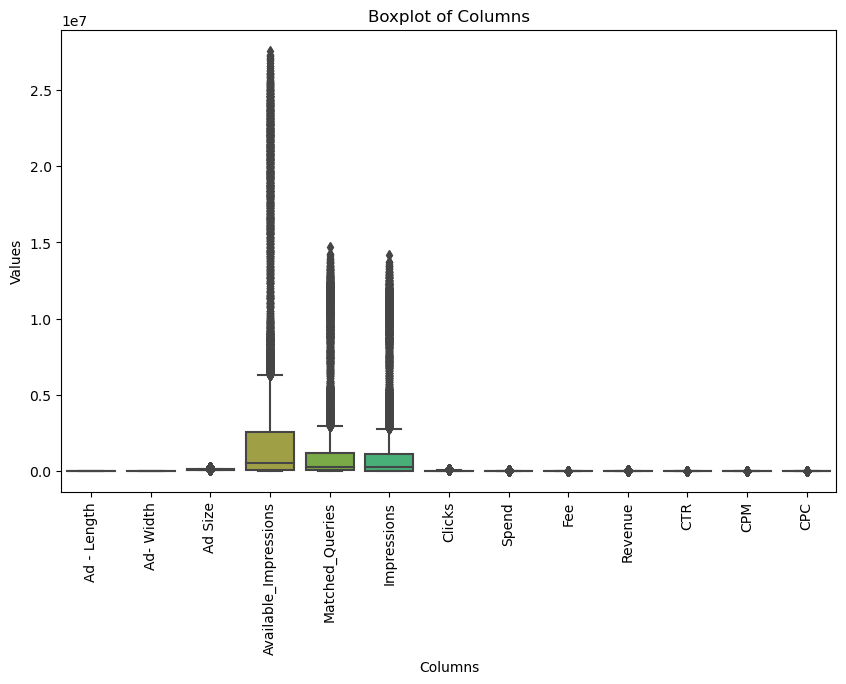

In [143]:
# Plotting the box plot before outlier treatment 
df = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [130]:
def remove_outlier(column):
    # Check if the column contains numeric data
    if np.issubdtype(column.dtype, np.number):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)        
        IQR = Q3 - Q1        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR      
        return lower_bound, upper_bound

    else:
                return None, None

# Iterate over each column in the DataFrame
for column in df.columns:
    # Call the remove_outlier() function to get the bounds
    LL, UL = remove_outlier(df[column])

    # Skip non-numeric columns
    if LL is None:
        continue

    # Replace values above the upper bound with the upper bound value
    df[column] = np.where(df[column] > UL, UL, df[column])

    # Replace values below the lower bound with the lower bound value
    df_pca[column] = np.where(df_pca[column] < LL, LL, df_pca[column])

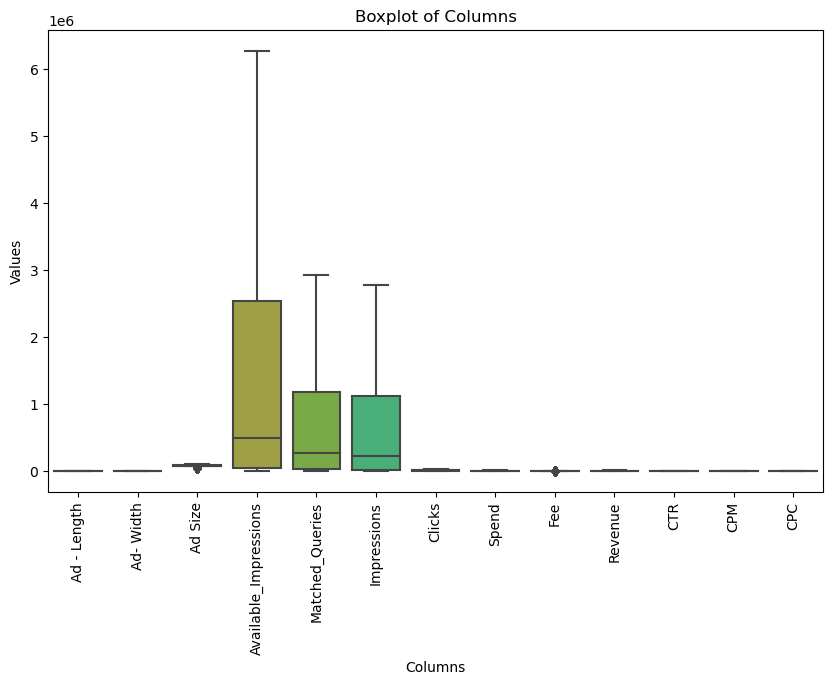

In [16]:
df = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.344599e+04,2.078532e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


In [18]:
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['Timestamp', 'InventoryType', 'Platform', 'Device Type','Format','Ad Type'], axis = 1)

In [19]:
df_pca.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


# Q.5) Perform z-score scaling and discuss how it affects the speed of the algorithm

In [111]:
from scipy.stats import zscore

# Select the columns you want to scale
columns_to_scale = ['Ad - Length', 'Ad- Width', 'Ad Size',  'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Convert non-numeric values to NaN
df_pca[columns_to_scale] = df_pca[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# Scale the selected columns
df_pca_scaled = df_pca[columns_to_scale].apply(zscore)

# Concatenate the scaled columns with the remaining columns from df_pca
df_scaled = pd.concat([df_pca_scaled, df_pca.drop(columns_to_scale, axis=1)], axis=1)



In [112]:
#Check the data post scaling
df_pca_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,0.074766,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.465447,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,0.074766,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.465447,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,0.074766,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.465447,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,0.074766,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.465447,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,0.074766,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.465447,-0.880093,-0.946281,-1.194498,-1.042561


In [117]:
df_pca_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,-4.030447e-15,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,5.390161e-15,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-4.596841e-15,1.000022,-1.917067,-0.069570,-0.069570,0.507774,1.373788
Available_Impressions,23066.0,-3.617510e-15,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.341008e-15,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,-1.224345e-15,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,1.960656e-15,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,1.250852e-15,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,-5.392803e-15,1.000022,-3.914682,-0.160285,0.465447,0.465447,0.465447
Revenue,23066.0,3.136228e-15,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


# Q.6) Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

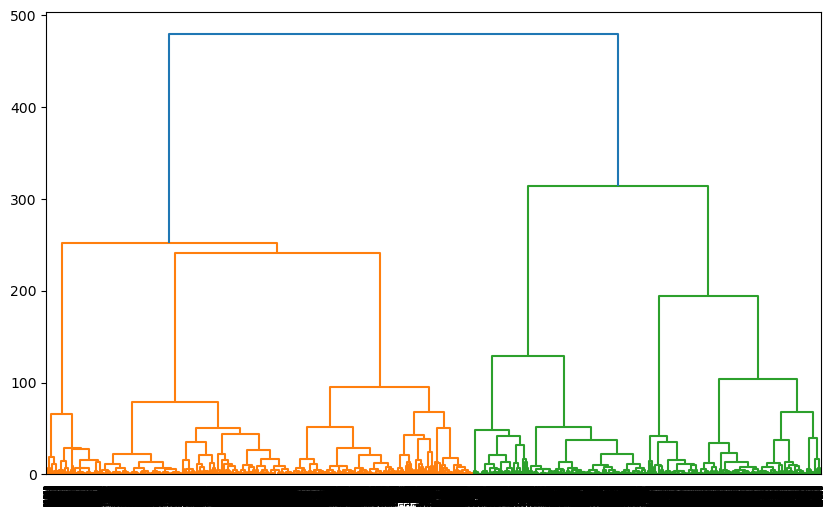

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage
X=df_pca_scaled
non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    X = X.drop(non_numeric_cols, axis=1)
Z = linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(10, 6))
dend = dendrogram(Z)
plt.show()

# Q.7) Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm

In [26]:
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [27]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [114]:
# Fit K means on the scaled_df
k_means.fit(df_pca_scaled)

KMeans(n_clusters=5, random_state=1)

In [115]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 1, 3, 1])

In [30]:
wss =[] 

In [116]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_pca_scaled)
    wss.append(round(KM.inertia_,2))


In [32]:
wss

[299858.0,
 182581.37,
 129899.18,
 97513.88,
 67660.44,
 53122.19,
 43390.05,
 38359.71,
 34526.62,
 31386.11]

In [33]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

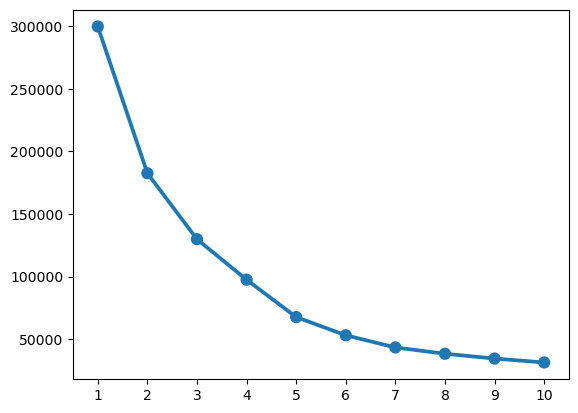

In [34]:
sns.pointplot(a, wss)

# Q.7) Print silhouette scores for up to 10 clusters and identify optimum number of clusters

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [37]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [38]:
# Calculating silhouette_score
silhouette_score(df_pca_scaled,labels,random_state=1)

0.38929427954125595

In [40]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [41]:
silhouette_score(df_pca_scaled,labels,random_state=1)

0.4387420087628461

In [42]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df_pca_scaled)
labels = k_means.labels_

In [43]:
silhouette_score(df_pca_scaled,labels,random_state=1)

0.5013502280108412

In [45]:
df_pca_scaled["Clus_kmeans5"] = labels
df_pca_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans5
0,-0.364496,-0.432797,0.074766,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.465447,-0.880093,-0.958836,-1.194498,-1.042561,0
1,-0.364496,-0.432797,0.074766,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.465447,-0.880093,-0.953835,-1.194498,-1.042561,0
2,-0.364496,-0.432797,0.074766,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.465447,-0.880093,-0.962218,-1.194498,-1.042561,0
3,-0.364496,-0.432797,0.074766,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.465447,-0.880093,-0.971871,-1.194498,-1.042561,0
4,-0.364496,-0.432797,0.074766,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.465447,-0.880093,-0.946281,-1.194498,-1.042561,0


In [46]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(df_pca_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3923066069287274
For n_clusters=3, the silhouette score is 0.4213647016545103
For n_clusters=4, the silhouette score is 0.47726717100695615
For n_clusters=5, the silhouette score is 0.5483112473610738
For n_clusters=6, the silhouette score is 0.5572454232383197
For n_clusters=7, the silhouette score is 0.5684396102017544
For n_clusters=8, the silhouette score is 0.5296758658996598
For n_clusters=9, the silhouette score is 0.46191222457922787
For n_clusters=10, the silhouette score is 0.4610009389013054


In [48]:
from sklearn.metrics import silhouette_score

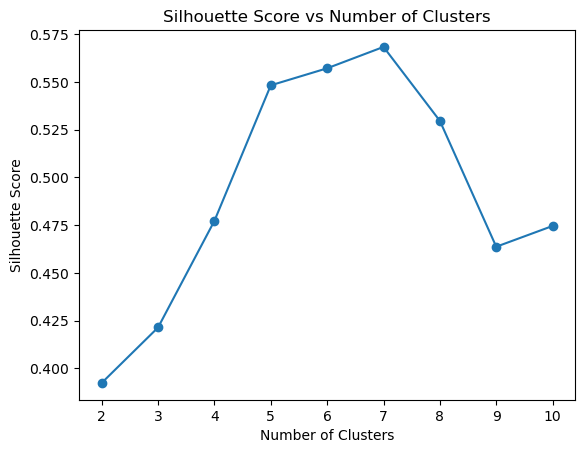

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [51]:
df_pca_scaled.Clus_kmeans5.value_counts().sort_index()

0    6270
1    4657
2    4034
3    6577
4    1528
Name: Clus_kmeans5, dtype: int64

In [52]:
clust_profile=df_pca_scaled.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df_pca_scaled.Clus_kmeans5.value_counts().sort_index()
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Clus_kmeans5,,,,,,,,,,,,,,
0,0.157336,-0.923395,-1.000389,0.098813,0.067319,0.078433,-0.525710,-0.270538,0.439101,-0.282469,-0.947401,-0.934464,0.629262,6270
1,1.285664,-0.181682,1.310748,-0.638310,-0.645540,-0.650055,0.610218,-0.376336,0.450130,-0.384384,0.616298,0.511152,-0.759200,4657
2,0.347694,-0.683182,-0.022701,1.930281,1.961320,1.961607,0.310486,1.477567,-1.402134,1.479219,-0.970056,-0.966281,1.321268,4034
3,-1.030500,1.157740,0.036976,-0.738809,-0.757701,-0.752633,-0.662091,-0.803222,0.464781,-0.793957,0.905949,0.879337,-0.712636,6577
4,-1.046356,1.163141,0.010911,-0.376019,-0.225377,-0.279795,2.327545,1.813587,-1.472563,1.842827,0.670734,1.042690,-0.689047,1528


# Problem Statement:2
## PCA:
PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.


# Q.1) Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [118]:
#Read the data
df1 = pd.read_excel("PCA India Data_Census.xlsx")

In [119]:
#Check the first few observations
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [61]:
#Check the last few observations
df1.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [59]:
df1.shape

(640, 61)

 # Thus 640 rows and 61 columns are present in the dataset

# Summarizing the dataset

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [63]:
#Check for presence of duplicate rows
df1.duplicated().sum()

0

# Thus there are no duplicates present in the dataset

In [64]:
#Check for presence of missing values in each feature
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

# Thus no null values present in the dataset

In [120]:
# Describing the function:- 
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


# Q.2) Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [66]:
# Separate the state-level and district-level data
state_data = df1.groupby('State').sum()
district_data = df1.groupby(['State', 'Dist.Code']).sum()

# Calculate gender ratios at the state level
state_data['Gender_Ratio'] = state_data['TOT_F'] / state_data['TOT_M']

# Identify state with highest and lowest gender ratios
state_highest = state_data['Gender_Ratio'].idxmax()
state_lowest = state_data['Gender_Ratio'].idxmin()

# Calculate gender ratios at the district level
district_data['Gender_Ratio'] = district_data['TOT_F'] / district_data['TOT_M']

# Identify district with highest and lowest gender ratios
district_highest = district_data['Gender_Ratio'].idxmax()
district_lowest = district_data['Gender_Ratio'].idxmin()

In [67]:
# Print the results
print("State with the highest gender ratio:", state_highest)
print("State with the lowest gender ratio:", state_lowest)
print("District with the highest gender ratio:", district_highest)
print("District with the lowest gender ratio:", district_lowest)

State with the highest gender ratio: Andhra Pradesh
State with the lowest gender ratio: Lakshadweep
District with the highest gender ratio: ('Andhra Pradesh', 547)
District with the lowest gender ratio: ('Lakshadweep', 587)


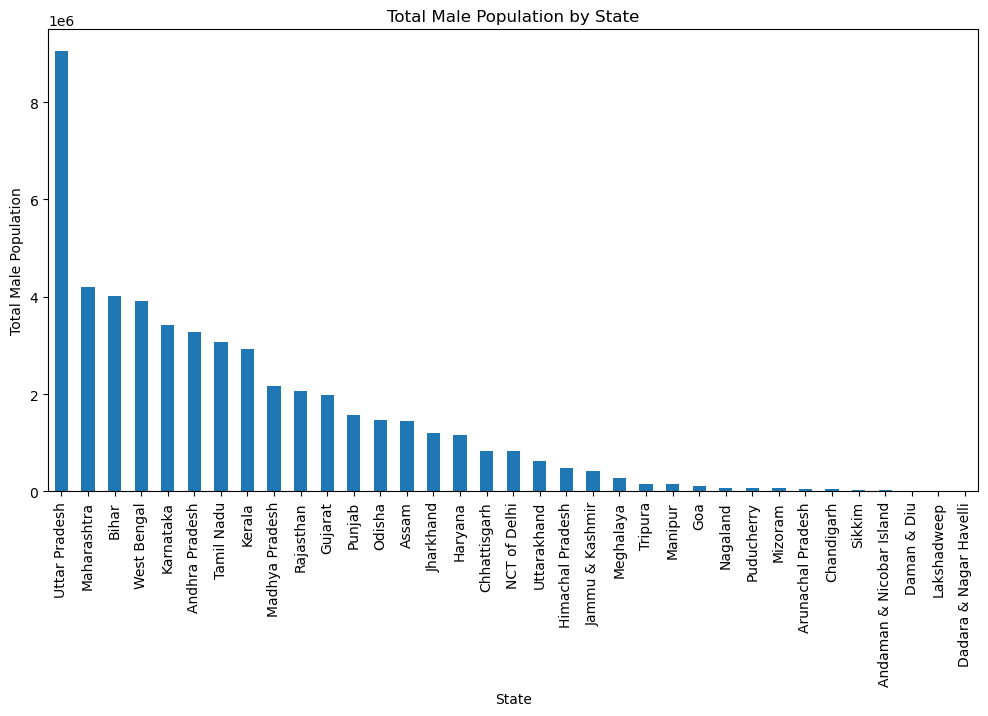

In [122]:
state_totals = df1.groupby('State')['TOT_M'].sum()
state_totals = state_totals.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total Male Population by State')
plt.xlabel('State')
plt.ylabel('Total Male Population')
plt.xticks(rotation=90)
plt.show()

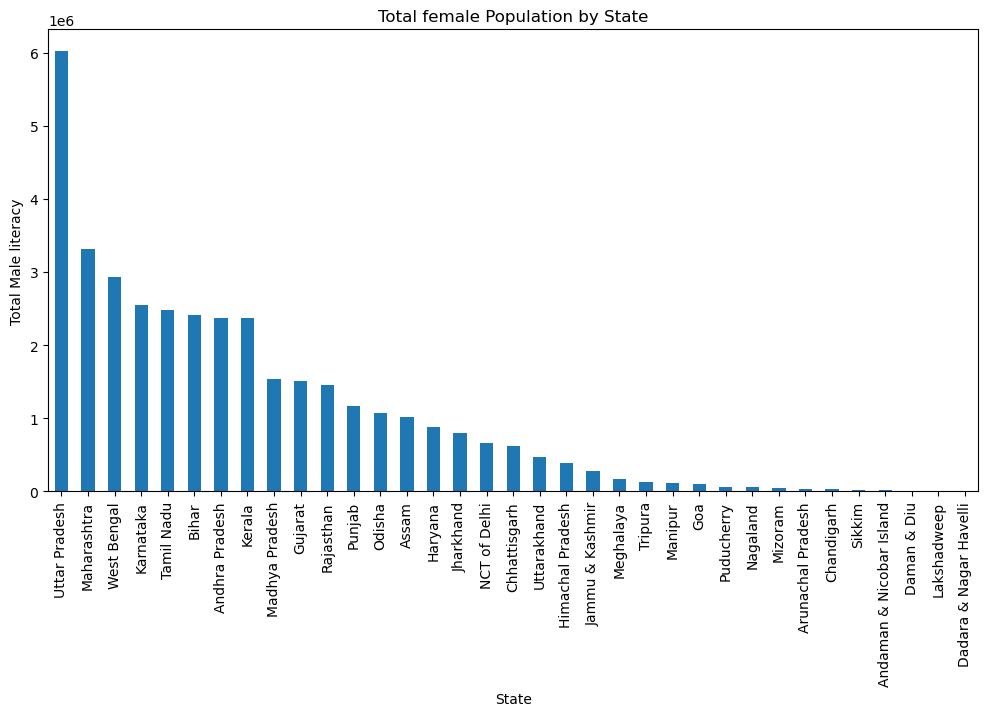

In [123]:
state_totals = df1.groupby('State')['M_LIT'].sum()
state_totals = state_totals.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total female Population by State')
plt.xlabel('State')
plt.ylabel('Total Male literacy')
plt.xticks(rotation=90)
plt.show()

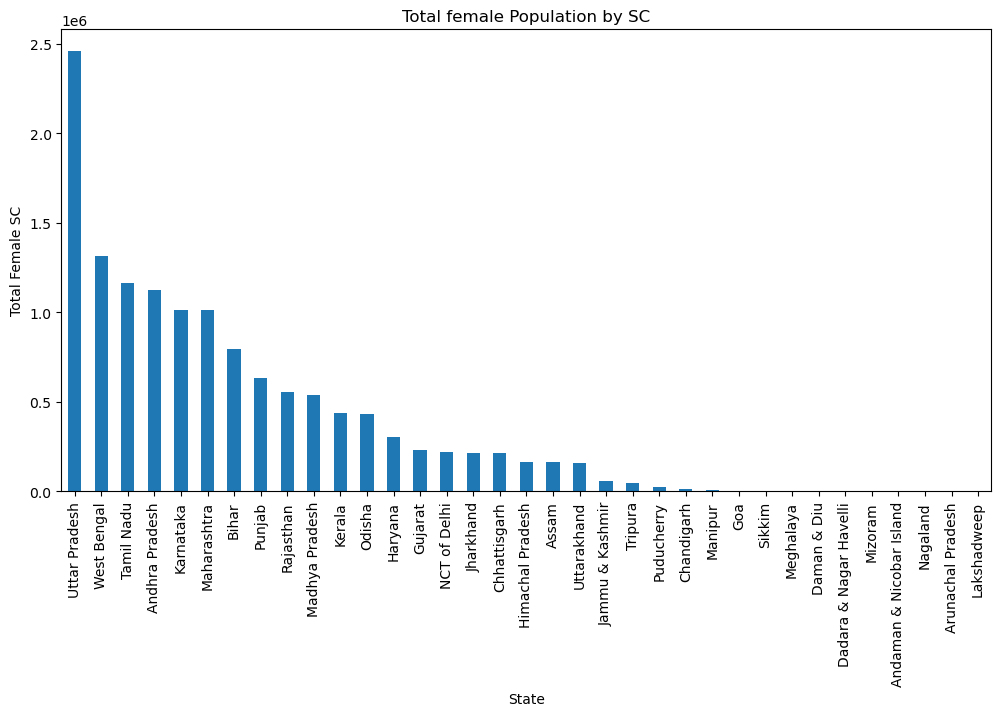

In [124]:
state_totals = df1.groupby('State')['F_SC'].sum()
state_totals = state_totals.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total female Population by SC')
plt.xlabel('State')
plt.ylabel('Total Female SC')
plt.xticks(rotation=90)
plt.show()

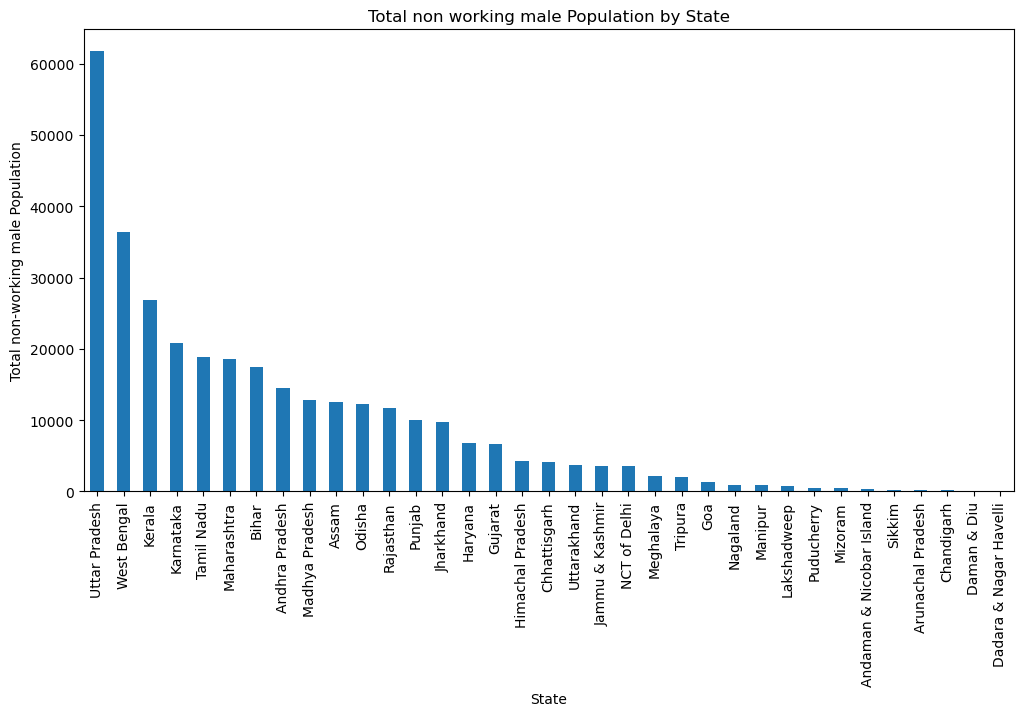

In [125]:
state_totals = df1.groupby('State')['NON_WORK_M'].sum()
state_totals = state_totals.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total non working male Population by State')
plt.xlabel('State')
plt.ylabel('Total non-working male Population')
plt.xticks(rotation=90)
plt.show()

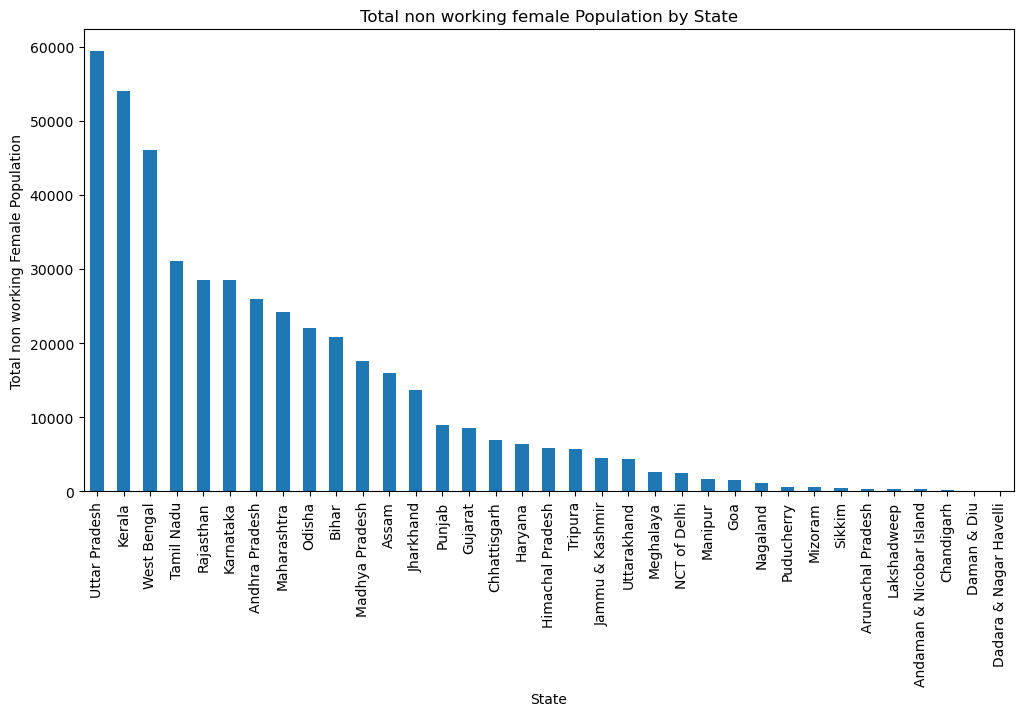

In [126]:
state_totals = df1.groupby('State')['NON_WORK_F'].sum()
state_totals = state_totals.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_totals.plot(kind='bar')
plt.title('Total non working female Population by State')
plt.xlabel('State')
plt.ylabel('Total non working Female Population')
plt.xticks(rotation=90)
plt.show()

# Q.3) We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [69]:
#Drop all columns other than the ones suitable for PCA
df1_pca = df1.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis = 1)

In [70]:
df1_pca.head(10)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
5,16345,25290,37426,6155,5294,2588,4000,7796,11111,16471,...,1808,3536,1277,2374,229,256,19,71,283,835
6,12510,22793,30491,3928,3200,5357,6906,988,1311,16735,...,502,561,160,283,133,120,11,19,198,139
7,9414,22960,30509,4246,4099,0,0,945,1180,14692,...,849,878,168,321,385,265,50,94,246,198
8,3814,10319,13058,1646,1779,0,0,1749,2308,5820,...,515,901,108,280,218,234,49,144,140,243
9,15095,39014,52278,6269,5704,11,3,200,237,25837,...,308,432,10,29,36,22,16,134,246,247


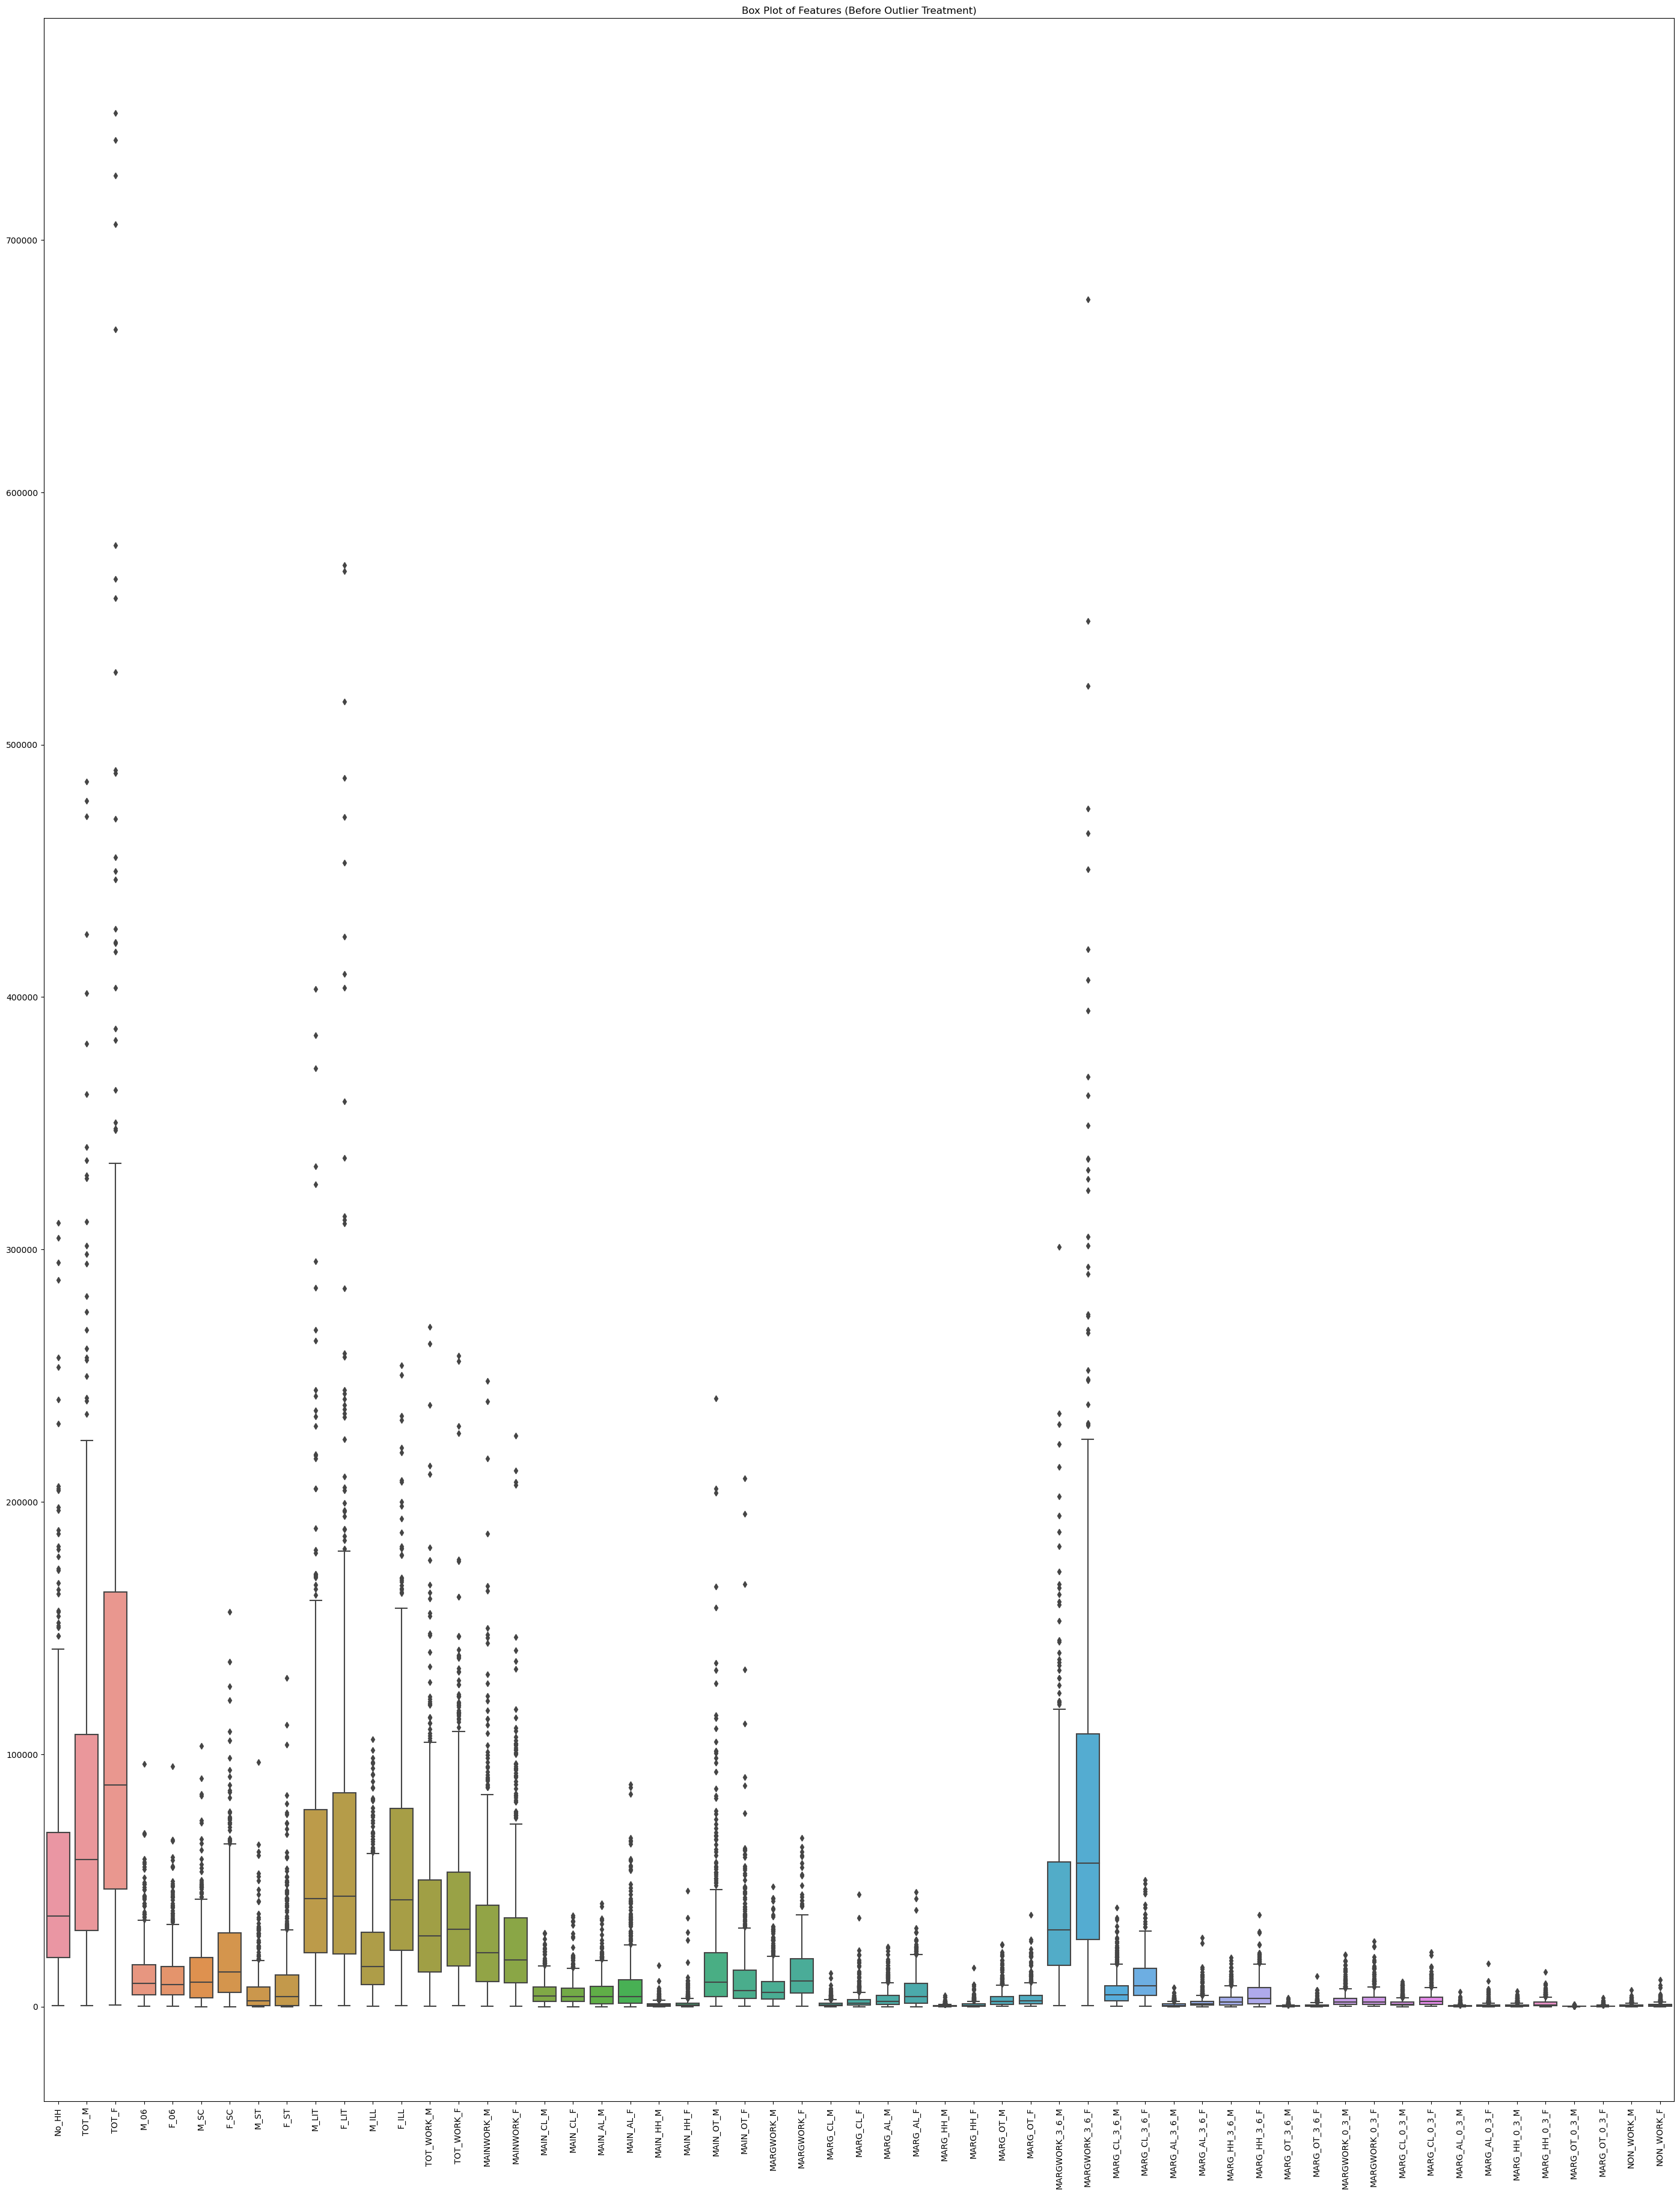

In [75]:
# Bar plot before removing outliers
plt.figure(figsize=(35, 45))
sns.boxplot(data=df1_pca)
plt.title('Box Plot of Features (Before Outlier Treatment)')
plt.xticks(rotation=90)
plt.show()

In [76]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [79]:
#Cap & floor the values beyond the outlier boundaries
for i in df1_pca:
    LL, UL = remove_outlier(df1_pca[i])
    df1_pca[i] = np.where(df1_pca[i] > UL, UL, df1_pca[i])
    df1_pca[i] = np.where(df1_pca[i] < LL, LL, df1_pca[i])

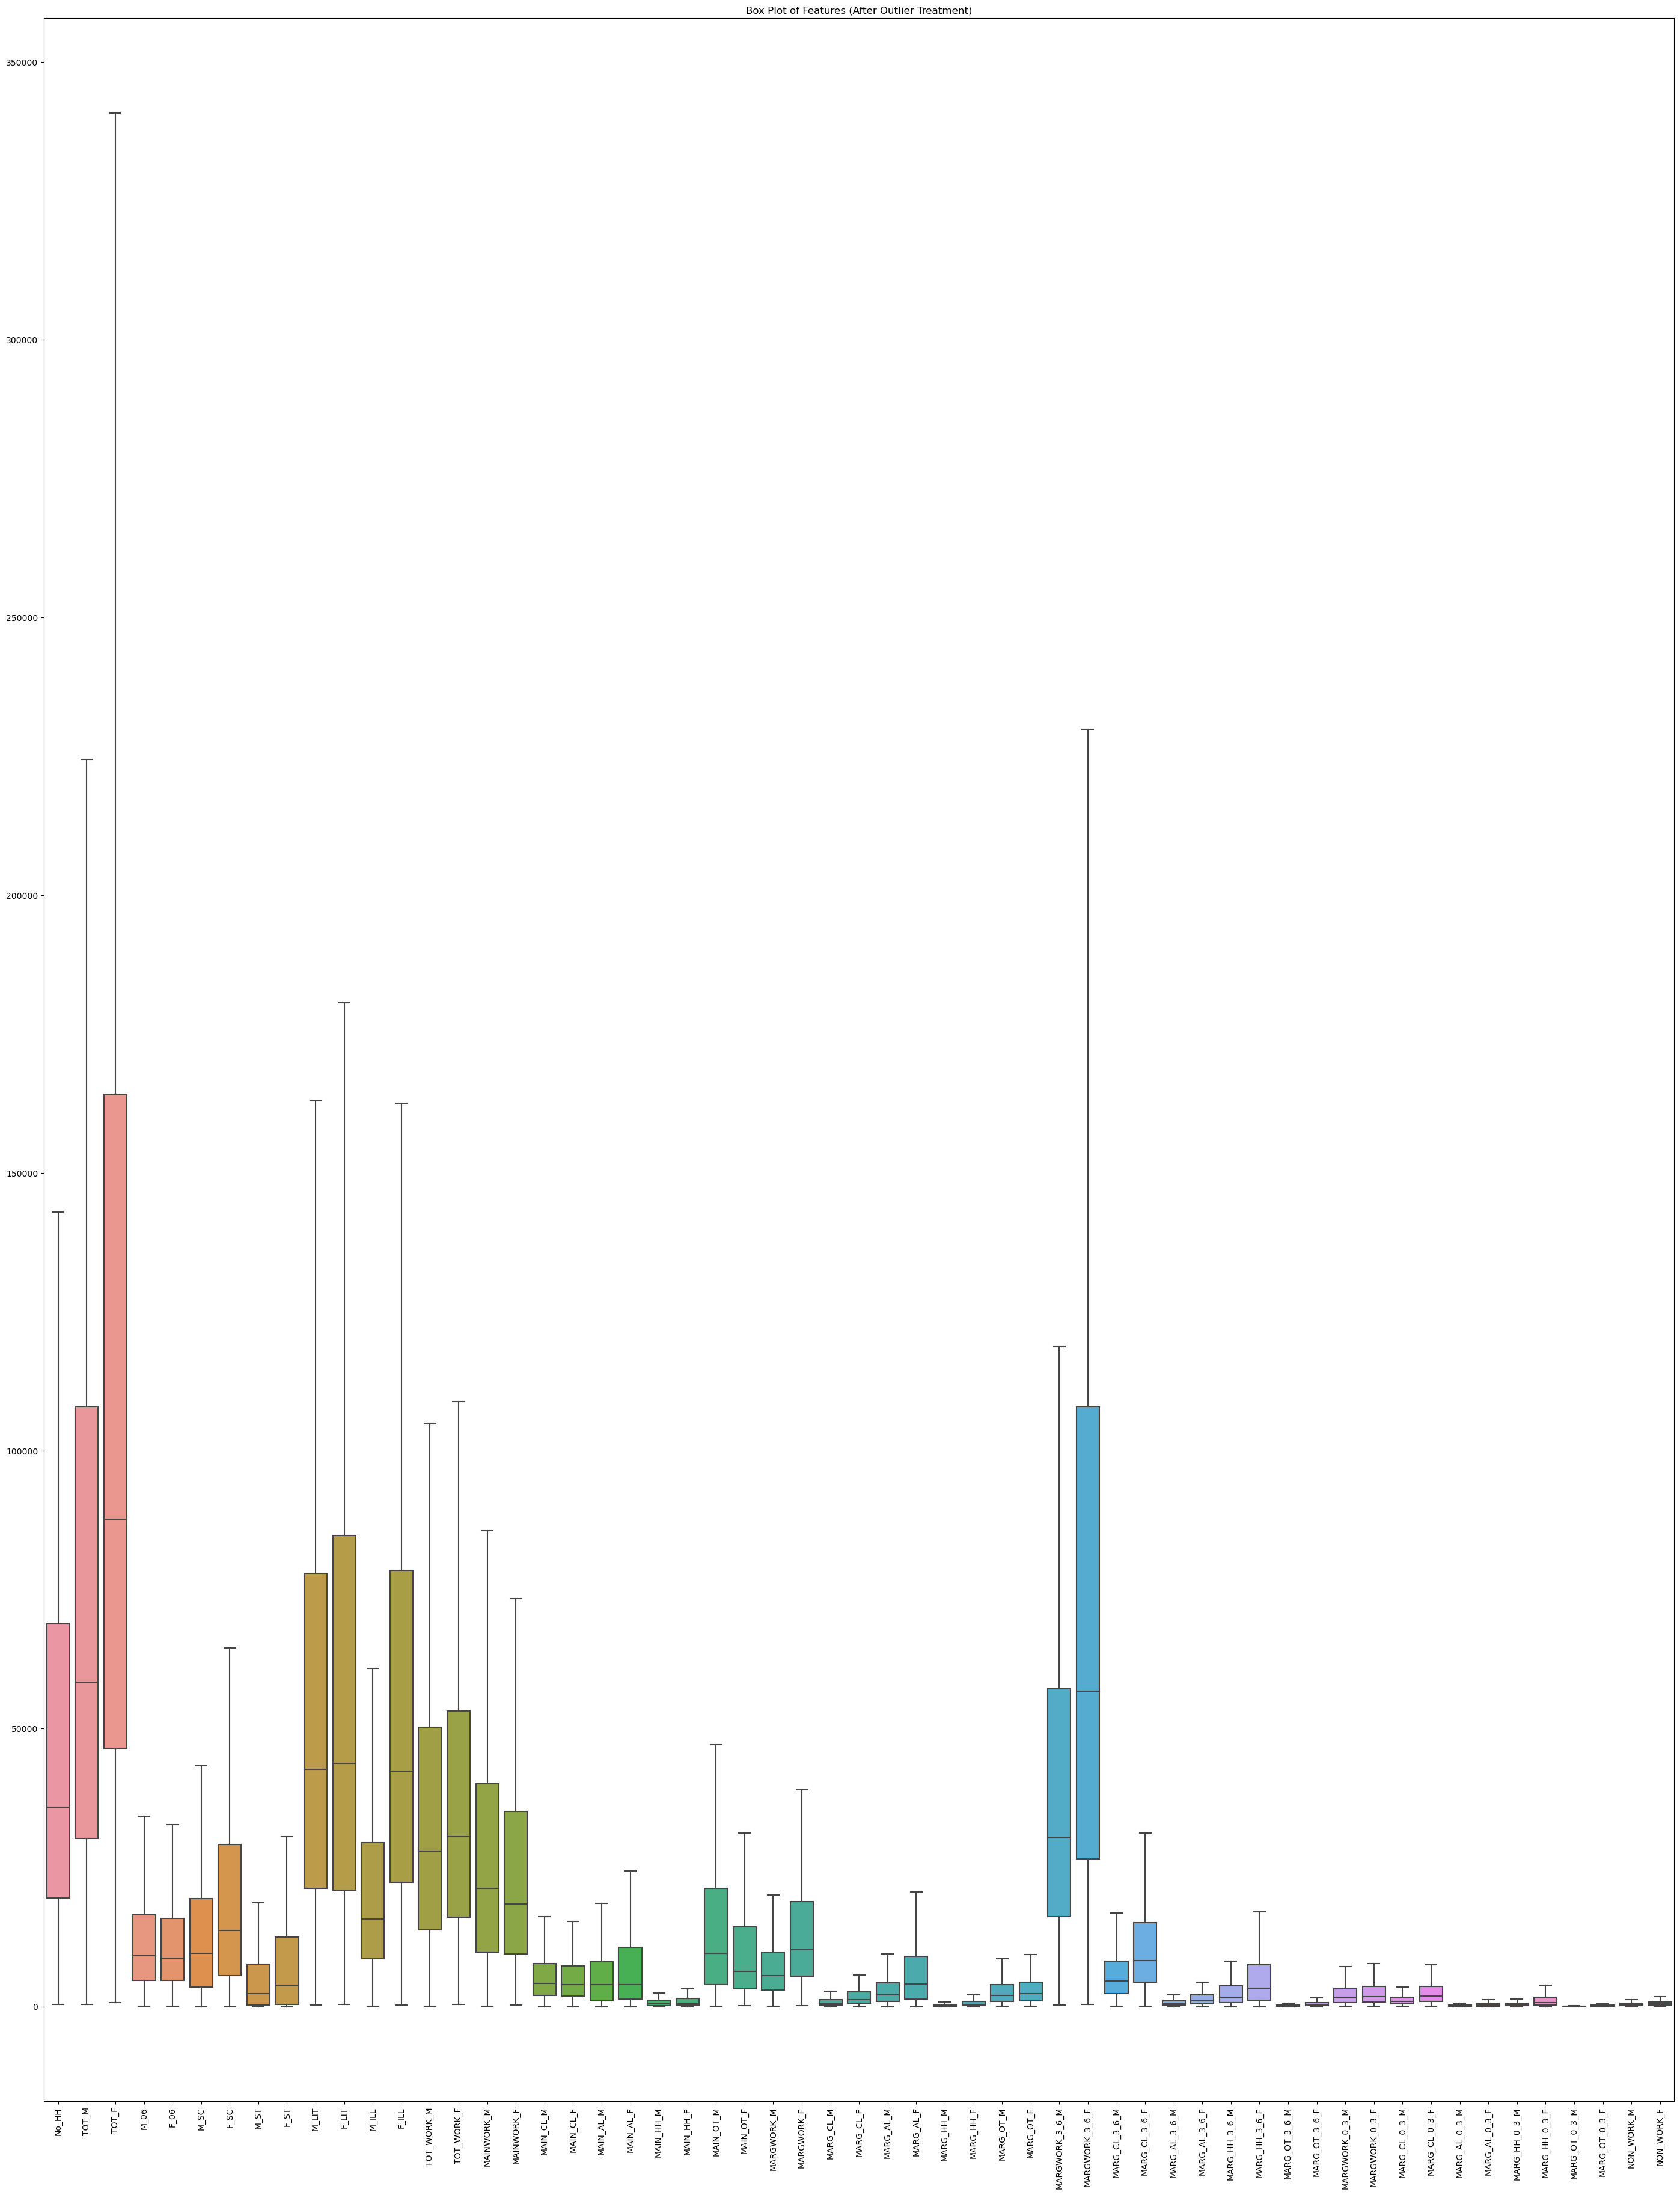

In [80]:
# Bar plot after removing outliers
plt.figure(figsize=(35, 45))
sns.boxplot(data=df1_pca)
plt.title('Box Plot of Features (After Outlier Treatment)')
plt.xticks(rotation=90)
plt.show()

# Q.4) Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [127]:
# Scaling the data
from scipy.stats import zscore
df1_pca_scaled = df1_pca.apply(zscore)
#Check the data post scaling
df1_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


In [85]:
df1_pca_scaled.describe() 

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,-1.516148e-16,1.457168e-17,8.881784e-17,3.295975e-17,-6.626644e-17,-5.342948e-17,8.673617e-17,-9.037909e-17,-1.144917e-16,-2.040035e-16,...,1.280226e-16,-2.393918e-17,2.411266e-17,-3.396589e-16,3.747003e-17,-7.598089e-17,5.030698e-18,-2.005340e-16,2.949030e-18,-3.191891e-17
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,...,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-1.226295e+00,-1.256930e+00,-1.253026e+00,-1.252604e+00,-1.245270e+00,-1.080447e+00,-1.079963e+00,-8.428341e-01,-8.337412e-01,-1.238527e+00,...,-1.240654e+00,-1.203773e+00,-1.005714e+00,-1.028083e+00,-1.070466e+00,-1.014472e+00,-1.026779e+00,-1.051594e+00,-1.187845e+00,-1.184337e+00
25%,-7.391433e-01,-7.611904e-01,-7.554317e-01,-7.467051e-01,-7.310260e-01,-7.961502e-01,-7.737908e-01,-7.939894e-01,-7.908336e-01,-7.589016e-01,...,-7.547019e-01,-7.615673e-01,-7.540257e-01,-7.499694e-01,-7.505070e-01,-7.533861e-01,-7.715445e-01,-7.762044e-01,-7.570439e-01,-7.621304e-01
50%,-3.227958e-01,-2.941277e-01,-3.079337e-01,-2.681143e-01,-2.864623e-01,-2.937658e-01,-3.308769e-01,-4.548195e-01,-4.506696e-01,-2.705225e-01,...,-2.947741e-01,-2.986165e-01,-3.925577e-01,-3.965870e-01,-3.485074e-01,-3.862889e-01,-3.886921e-01,-3.278957e-01,-3.155397e-01,-2.840865e-01
75%,5.187848e-01,5.296328e-01,5.231388e-01,5.280048e-01,5.199796e-01,5.131537e-01,5.144885e-01,4.305389e-01,4.130522e-01,5.351530e-01,...,4.709380e-01,4.986411e-01,4.441736e-01,4.230817e-01,4.343956e-01,4.843624e-01,4.134749e-01,4.854642e-01,4.296660e-01,4.780408e-01
max,2.405677e+00,2.465868e+00,2.440995e+00,2.440070e+00,2.396488e+00,2.477110e+00,2.446907e+00,2.267331e+00,2.218881e+00,2.476235e+00,...,2.309398e+00,2.388954e+00,2.241473e+00,2.182658e+00,2.211749e+00,2.340985e+00,2.191004e+00,2.377967e+00,2.209731e+00,2.338298e+00


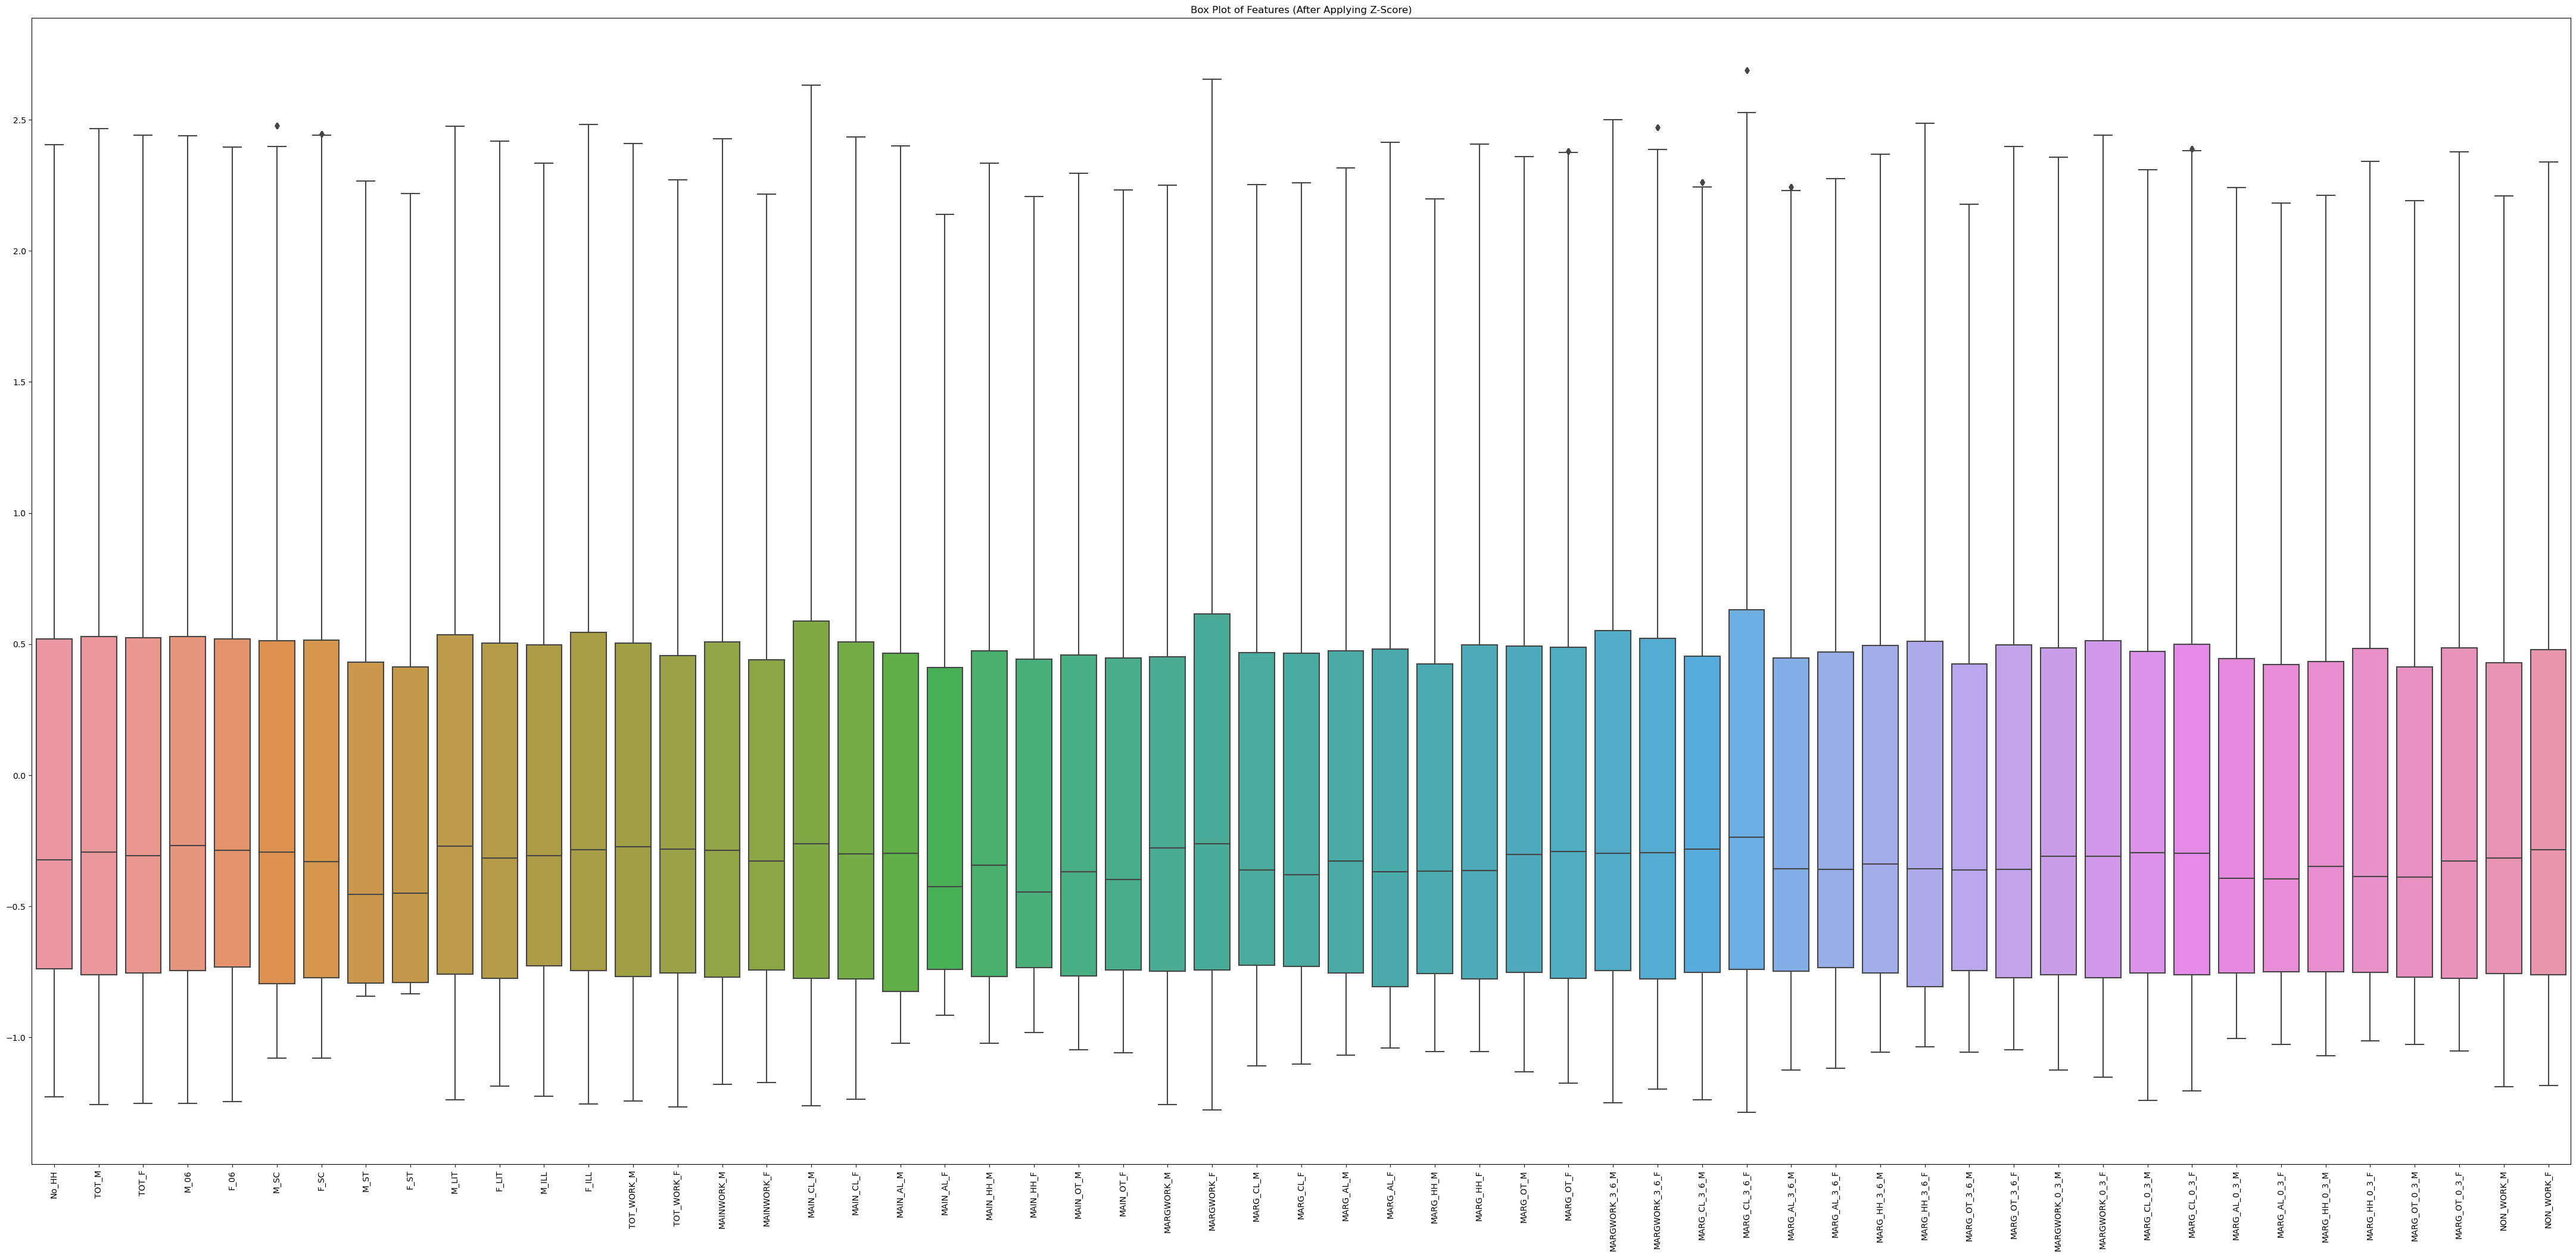

In [86]:
plt.figure(figsize=(55, 25))
sns.boxplot(data=df1_pca_scaled)
plt.title('Box Plot of Features (After Applying Z-Score)')
plt.xticks(rotation=90)
plt.show()

# Q.5) Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [91]:
columns = df1_pca_scaled.columns

# Create a subset DataFrame using the desired columns
subset_df1 = df1_pca_scaled[columns]

# Calculate the covariance matrix
cov_matrix = subset_df1.cov()
print(cov_matrix)

                   No_HH     TOT_M     TOT_F      M_06      F_06      M_SC  \
No_HH           1.001565  0.912699  0.973013  0.812856  0.809883  0.806713   
TOT_M           0.912699  1.001565  0.980122  0.965044  0.960153  0.877158   
TOT_F           0.973013  0.980122  1.001565  0.914418  0.911167  0.857664   
M_06            0.812856  0.965044  0.914418  1.001565  0.999032  0.833344   
F_06            0.809883  0.960153  0.911167  0.999032  1.001565  0.823888   
M_SC            0.806713  0.877158  0.857664  0.833344  0.823888  1.001565   
F_SC            0.858562  0.861703  0.876435  0.796794  0.790043  0.984688   
M_ST            0.116300  0.023439  0.076189 -0.006081  0.006803 -0.096913   
F_ST            0.122722  0.013301  0.074248 -0.021166 -0.007896 -0.099226   
M_LIT           0.931350  0.989312  0.983281  0.924761  0.915929  0.868007   
F_LIT           0.940747  0.937579  0.963424  0.844453  0.835104  0.805082   
M_ILL           0.782405  0.933452  0.880243  0.967971  0.972547

In [92]:
eigenvalues, _ = np.linalg.eig(cov_matrix)
print(eigenvalues)

[3.56488638e+01 7.64357559e+00 3.76919551e+00 2.77722349e+00
 1.90694892e+00 1.15490310e+00 9.87726707e-01 4.64629906e-01
 3.96708513e-01 3.22346888e-01 2.73207369e-01 2.35647574e-01
 1.81401107e-01 1.69243770e-01 1.38592325e-01 1.31505852e-01
 1.03809666e-01 9.55333831e-02 8.58580407e-02 8.09138742e-02
 6.60179067e-02 6.30797999e-02 4.82756124e-02 4.37747566e-02
 4.59506197e-02 3.19339710e-02 2.86194563e-02 2.75481445e-02
 2.34340044e-02 2.20296816e-02 1.87487040e-02 1.59004895e-02
 1.39957919e-02 1.18916465e-02 1.11133495e-02 9.07842645e-03
 7.25127869e-03 6.27213692e-03 4.95541908e-03 4.60667097e-03
 3.45902033e-03 2.18408510e-03 2.13514664e-03 1.92111328e-03
 1.43840980e-03 1.09968912e-03 9.65752052e-04 8.62630267e-04
 6.51634478e-04 5.76658846e-04 4.35790607e-04 3.70037468e-04
 3.06660171e-04 4.61745385e-05 2.07854170e-04 8.97034441e-05
 1.38286484e-04]


In [94]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_pca_scaled)
p_value

0.0

In [95]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_pca_scaled)
kmo_model

0.9361896166652829

In [97]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df1_pca_scaled)

In [98]:
#Extract eigen vectors
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921,  0.15634043,  0.1568144 ,
         0.14335015,  0.14353705,  0.01884873,  0.01787797,  0.15515239,
         0.14544984,  0.1545511 ,  0.15828347,  0.15407627,  0.14252995,
         0.14193201,  0.12573163,  0.11169244,  0.08303496,  0.11929067,
         0.09008881,  0.14184969,  0.13388011,  0.1227618 ,  0.1168656 ,
         0.15665637,  0.14869489,  0.08816344,  0.06516026,  0.1272781 ,
         0.11588826,  0.14536607,  0.14230182,  0.15087675,  0.14801846,
         0.15790761,  0.15583101,  0.15764021,  0.1495015 ,  0.0947852 ,
         0.06715842,  0.12818439,  0.11395923,  0.14510769,  0.14102942,
         0.15092232,  0.14753416,  0.14298675,  0.13378373,  0.06296394,
         0.05674058,  0.11910165,  0.11304417,  0.14213963,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, -0.02034061, -0.01431023,
        -0.07966701, -0.08709832,  0.06910144,  0.06731586, -0.10598636,
        -0.13323

In [99]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([35.64886379,  7.64357559,  3.76919551,  2.77722349,  1.90694892,
        1.1549031 ,  0.98772671,  0.46462991,  0.39670851,  0.32234683,
        0.27320732,  0.23564734])

In [100]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.62444145, 0.13388829, 0.06602291, 0.04864709, 0.03340297,
       0.0202298 , 0.01730146, 0.00813867, 0.00694892, 0.00564637,
       0.00478562, 0.0041277 ])

# Q.6) Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [102]:
#Create a dataframe containing the loadings or coefficients of all PCs
df1_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [104]:
df1_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090,0.082558,0.106896,-0.099513,0.026098,0.068129,-0.058620,-0.021775
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344,0.073667,-0.124085,-0.108870,0.032855,-0.048428,0.029491,-0.047668
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927,0.082812,-0.010291,-0.115276,0.036404,-0.022466,-0.020153,-0.042827
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339,0.092379,-0.200807,-0.132945,0.138407,-0.157238,-0.009166,-0.146674
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326,0.080010,-0.203411,-0.139343,0.165716,-0.145031,-0.025572,-0.144631
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893,0.050969,-0.040399,0.189169,-0.531743,-0.098456,-0.194630,-0.122621
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092,0.054568,0.053990,0.177363,-0.515063,-0.065839,-0.250366,-0.114525
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412,-0.231809,-0.355238,-0.071632,-0.113019,-0.008386,-0.082495,-0.055517
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965,-0.214542,-0.327677,-0.078391,-0.136031,-0.028613,-0.081430,-0.051223
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033,0.081378,-0.067062,-0.102886,-0.017445,0.000573,0.023821,0.034672


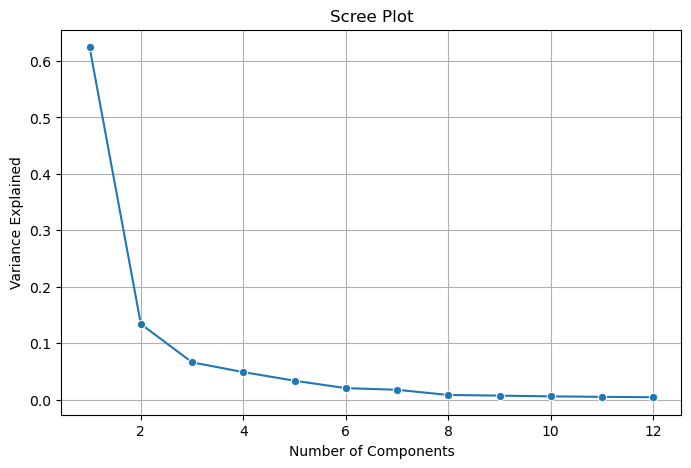

In [105]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

We will take 5 optimal no of Pc’s as 5 Pc’s are enough to explain the 90% of the variance

# Q.7) Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [106]:
#Choose the PCs basis cumulative explained variance
df1_selected = df1_extracted_loadings[['PC1','PC2', 'PC3','PC4','PC5']]

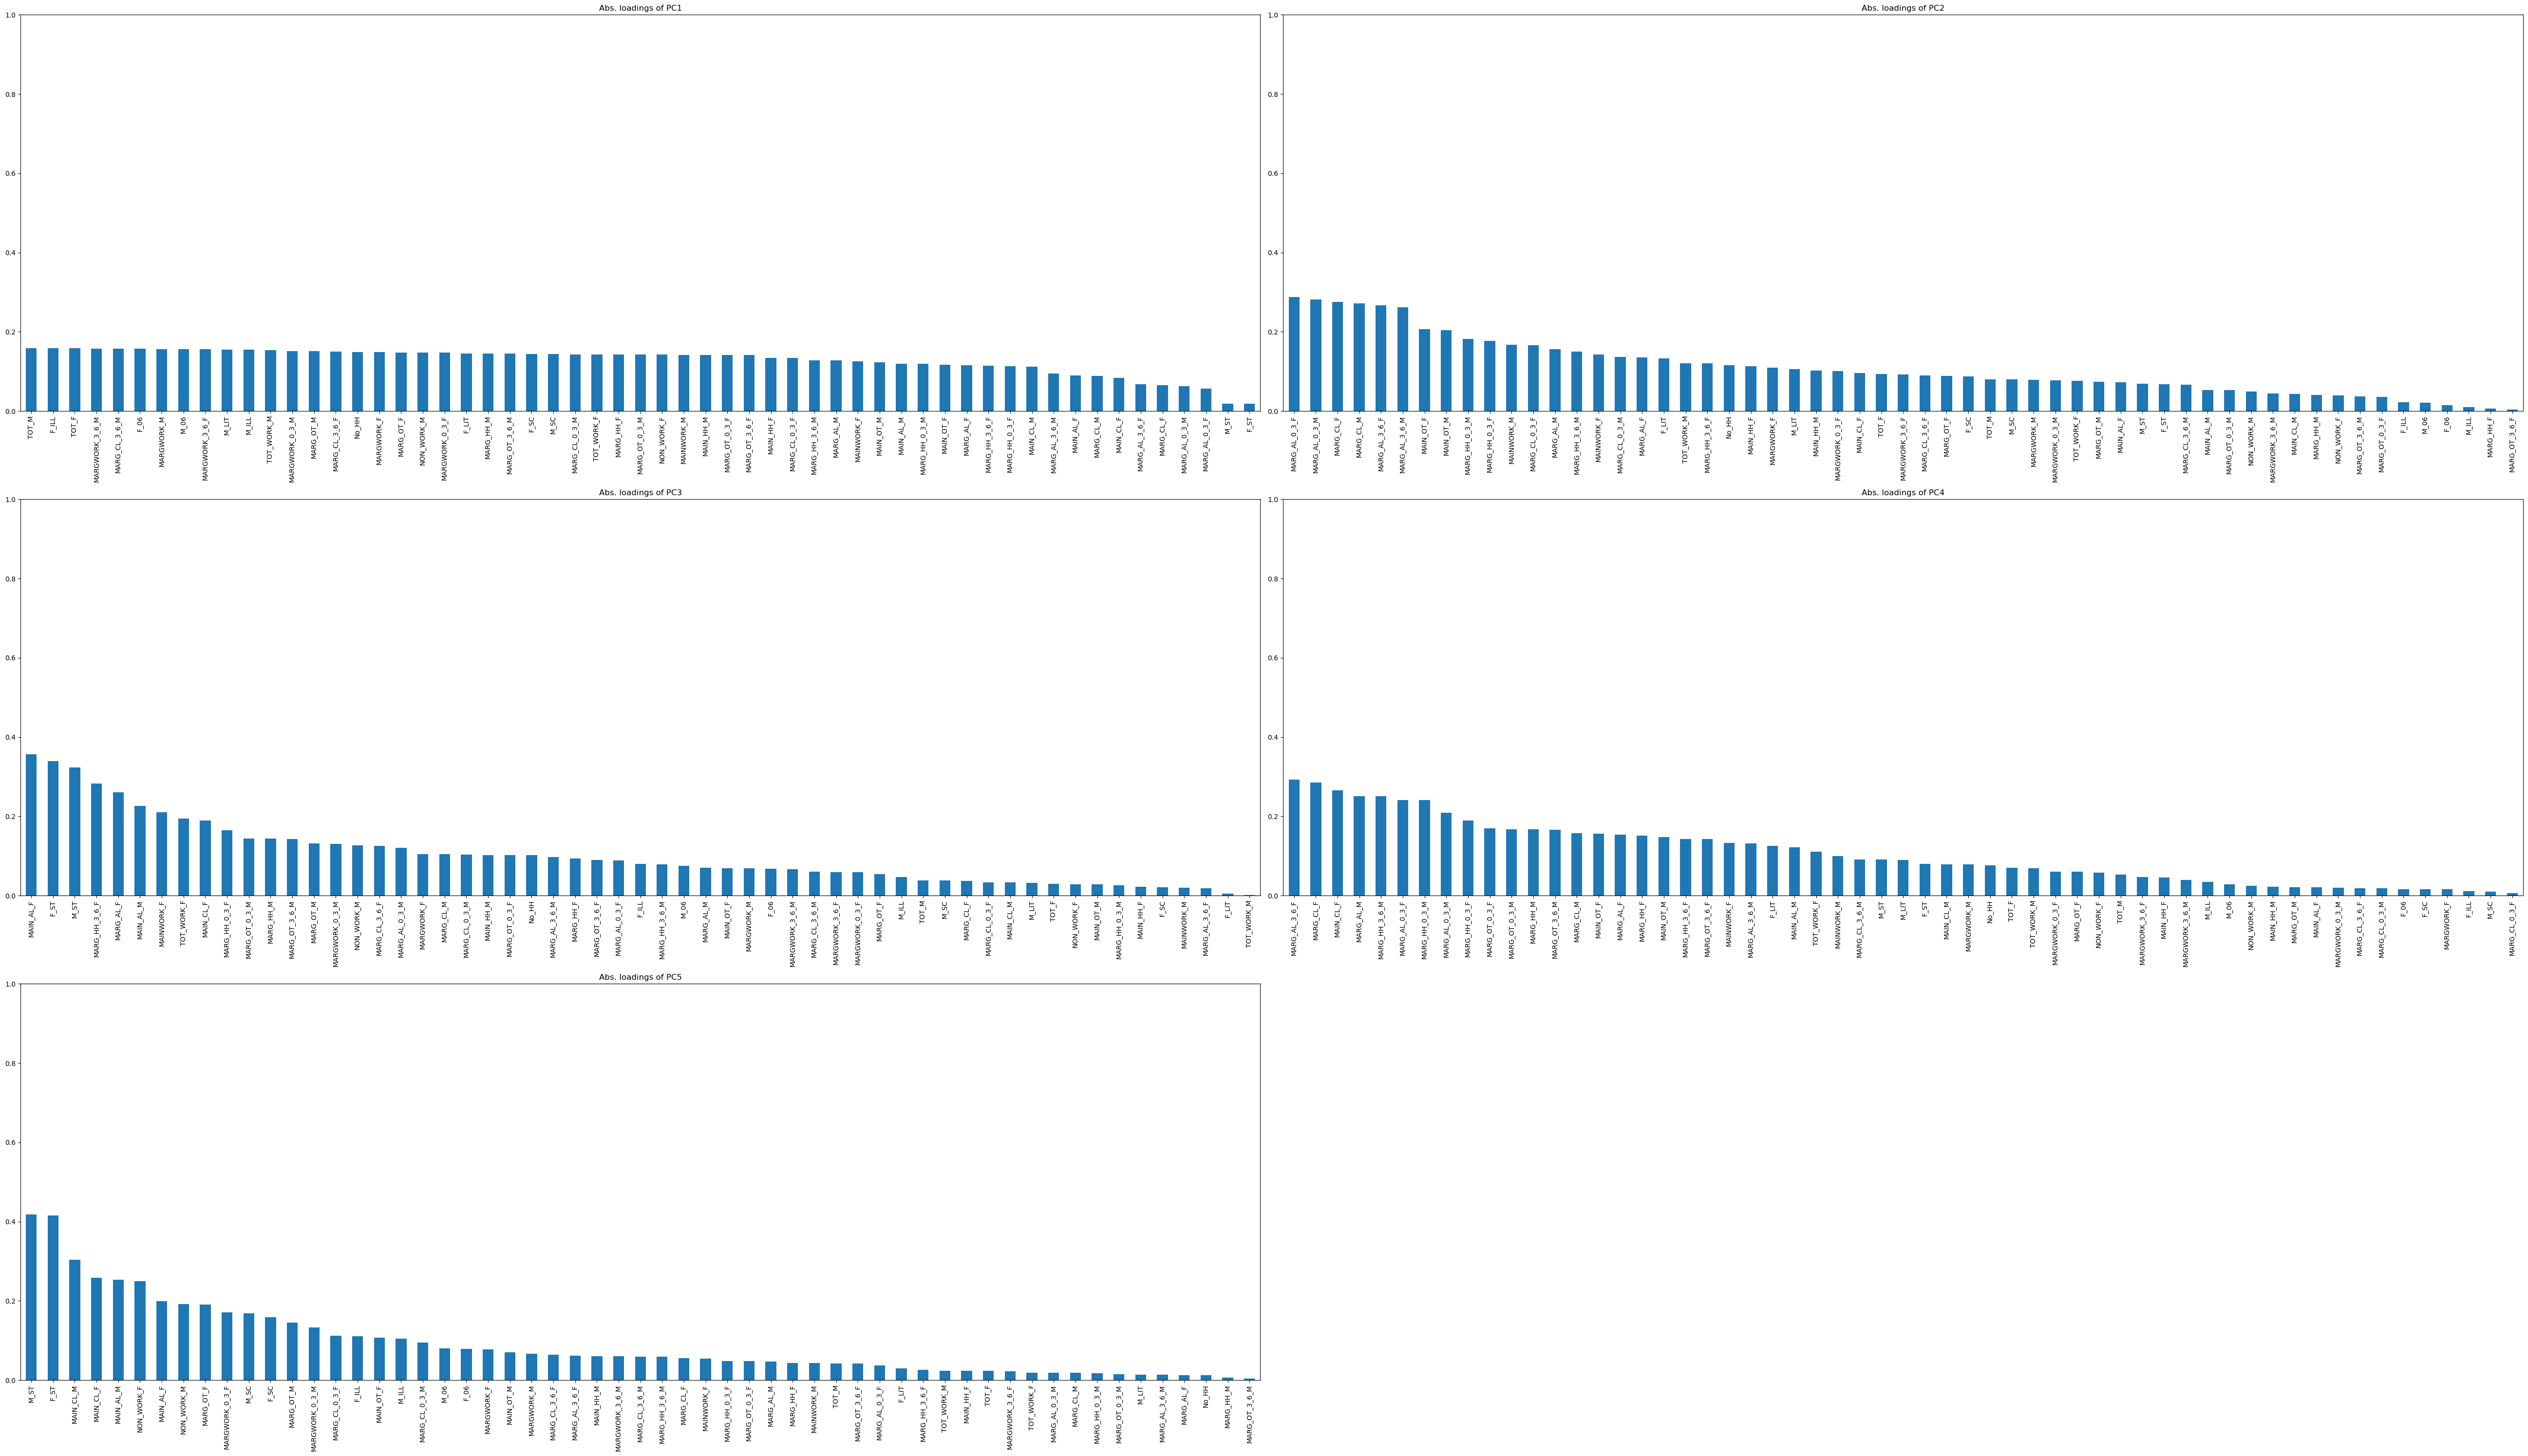

In [108]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (52,30))
for i in range(len(df1_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df1_selected[df1_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df1_selected.columns[i]))
    plt.tight_layout()

From above graph we can observe that most variance explain by PC1

# Q.8)  Write linear equation for first PC

The linear equation for first PC is as follows :-

PC1=a1x1+a2x2+..........................................an*xn